# 문제 1
- 로봇 시뮬레이션
- https://www.acmicpc.net/problem/2174

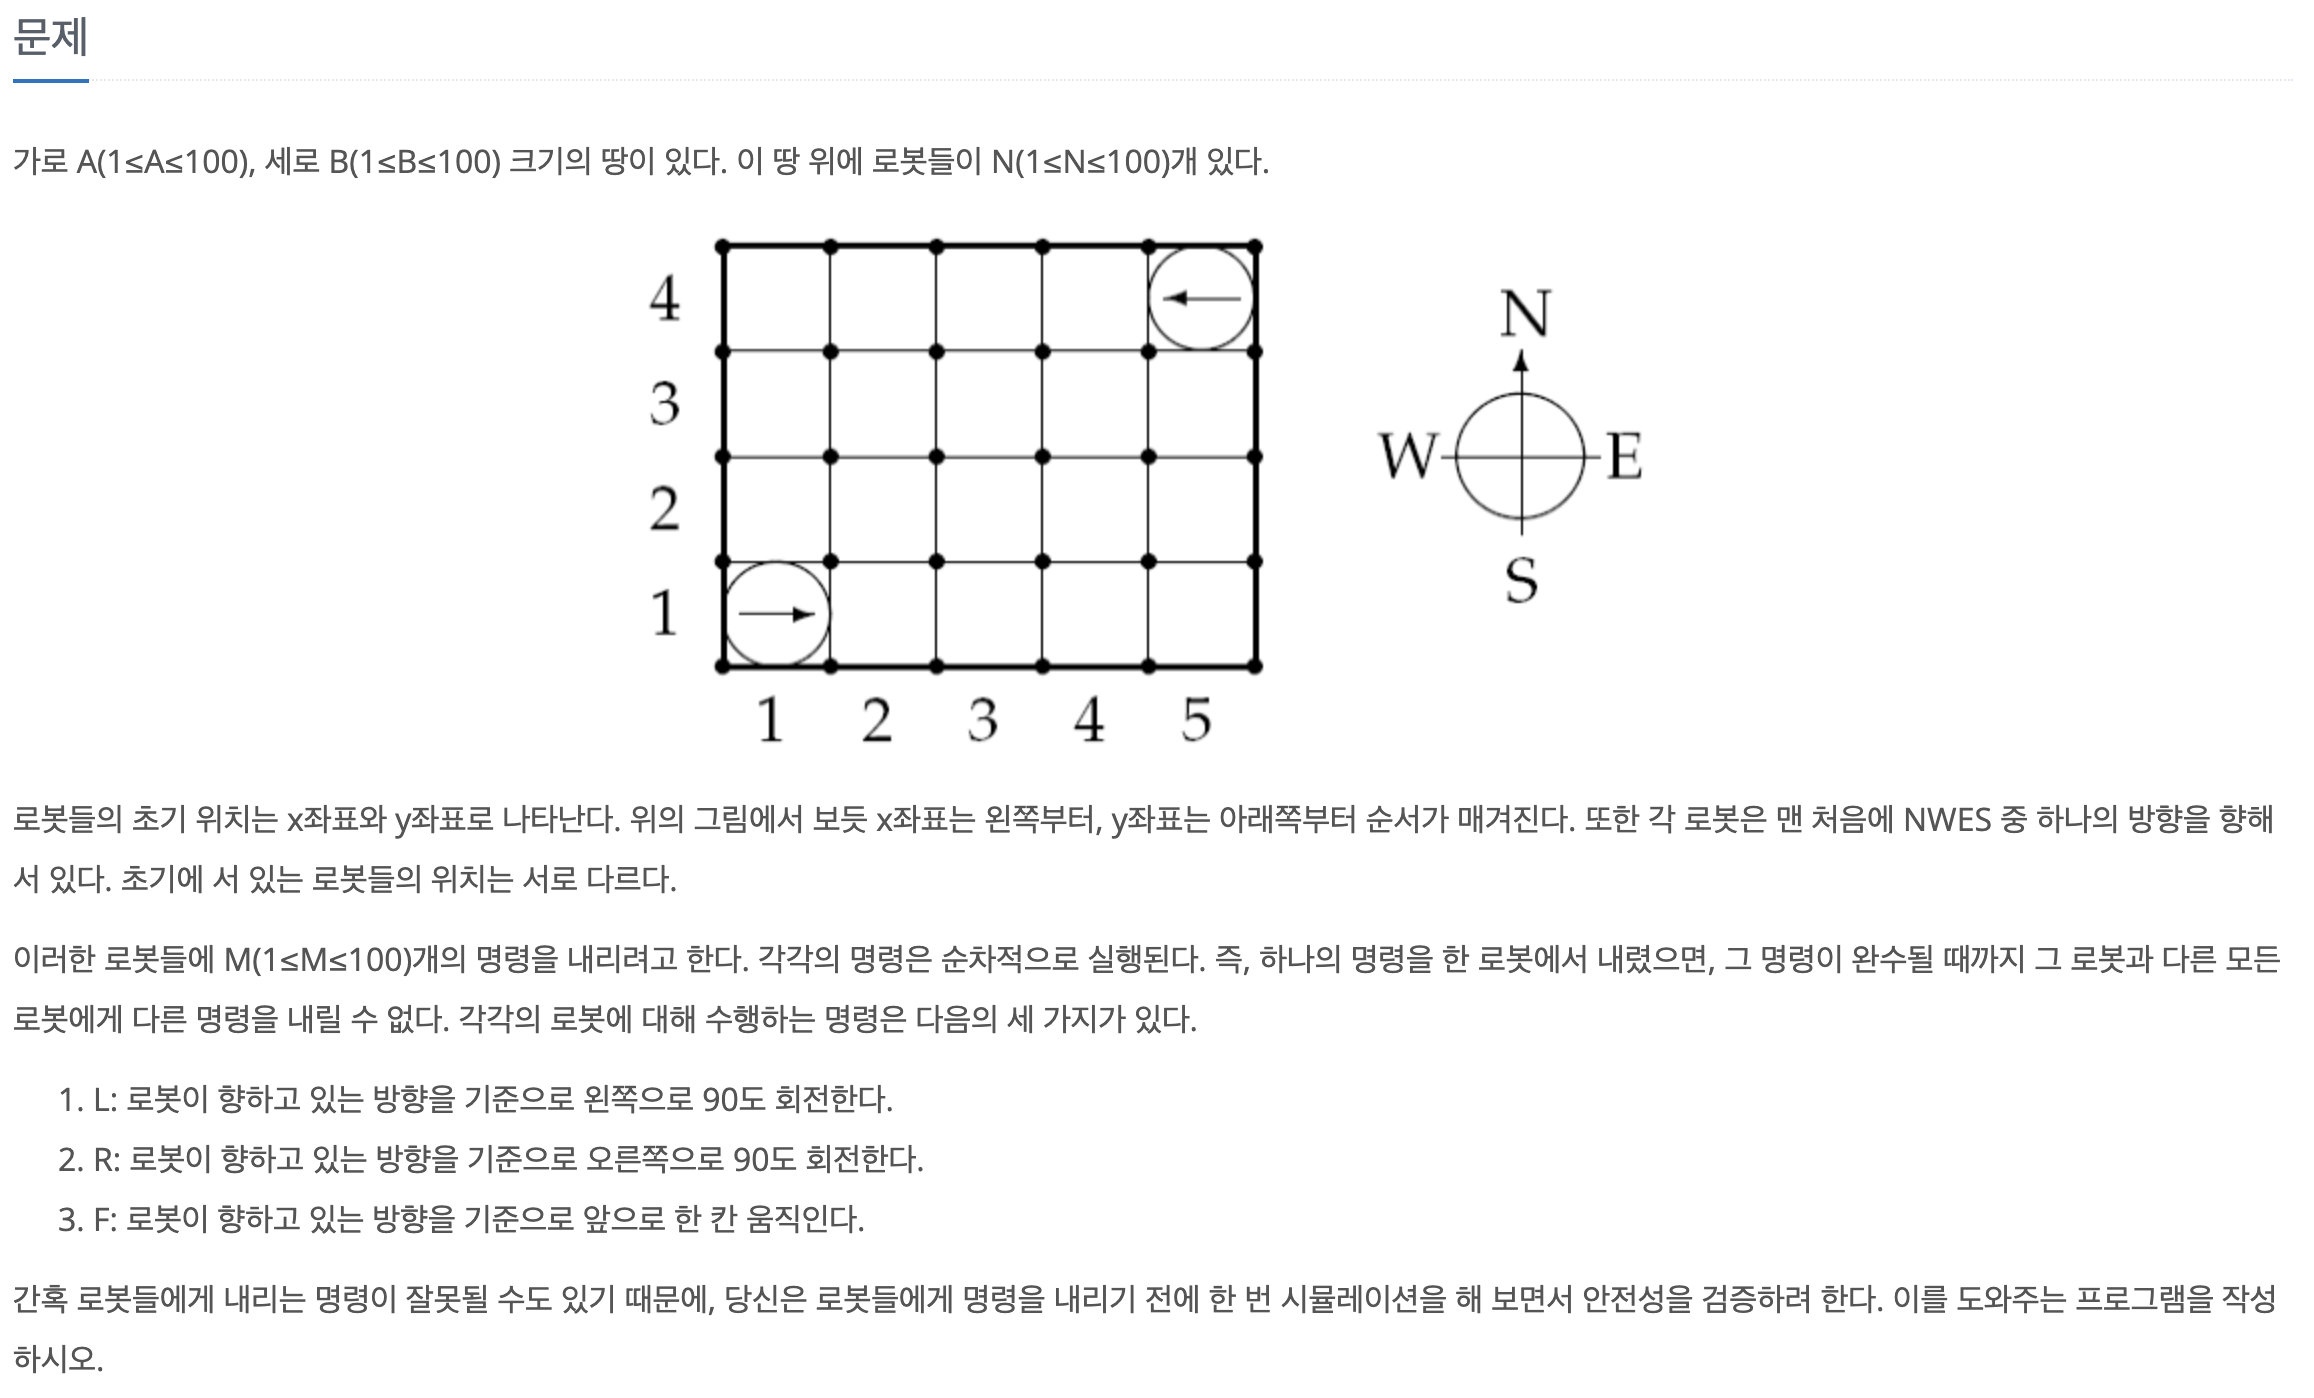
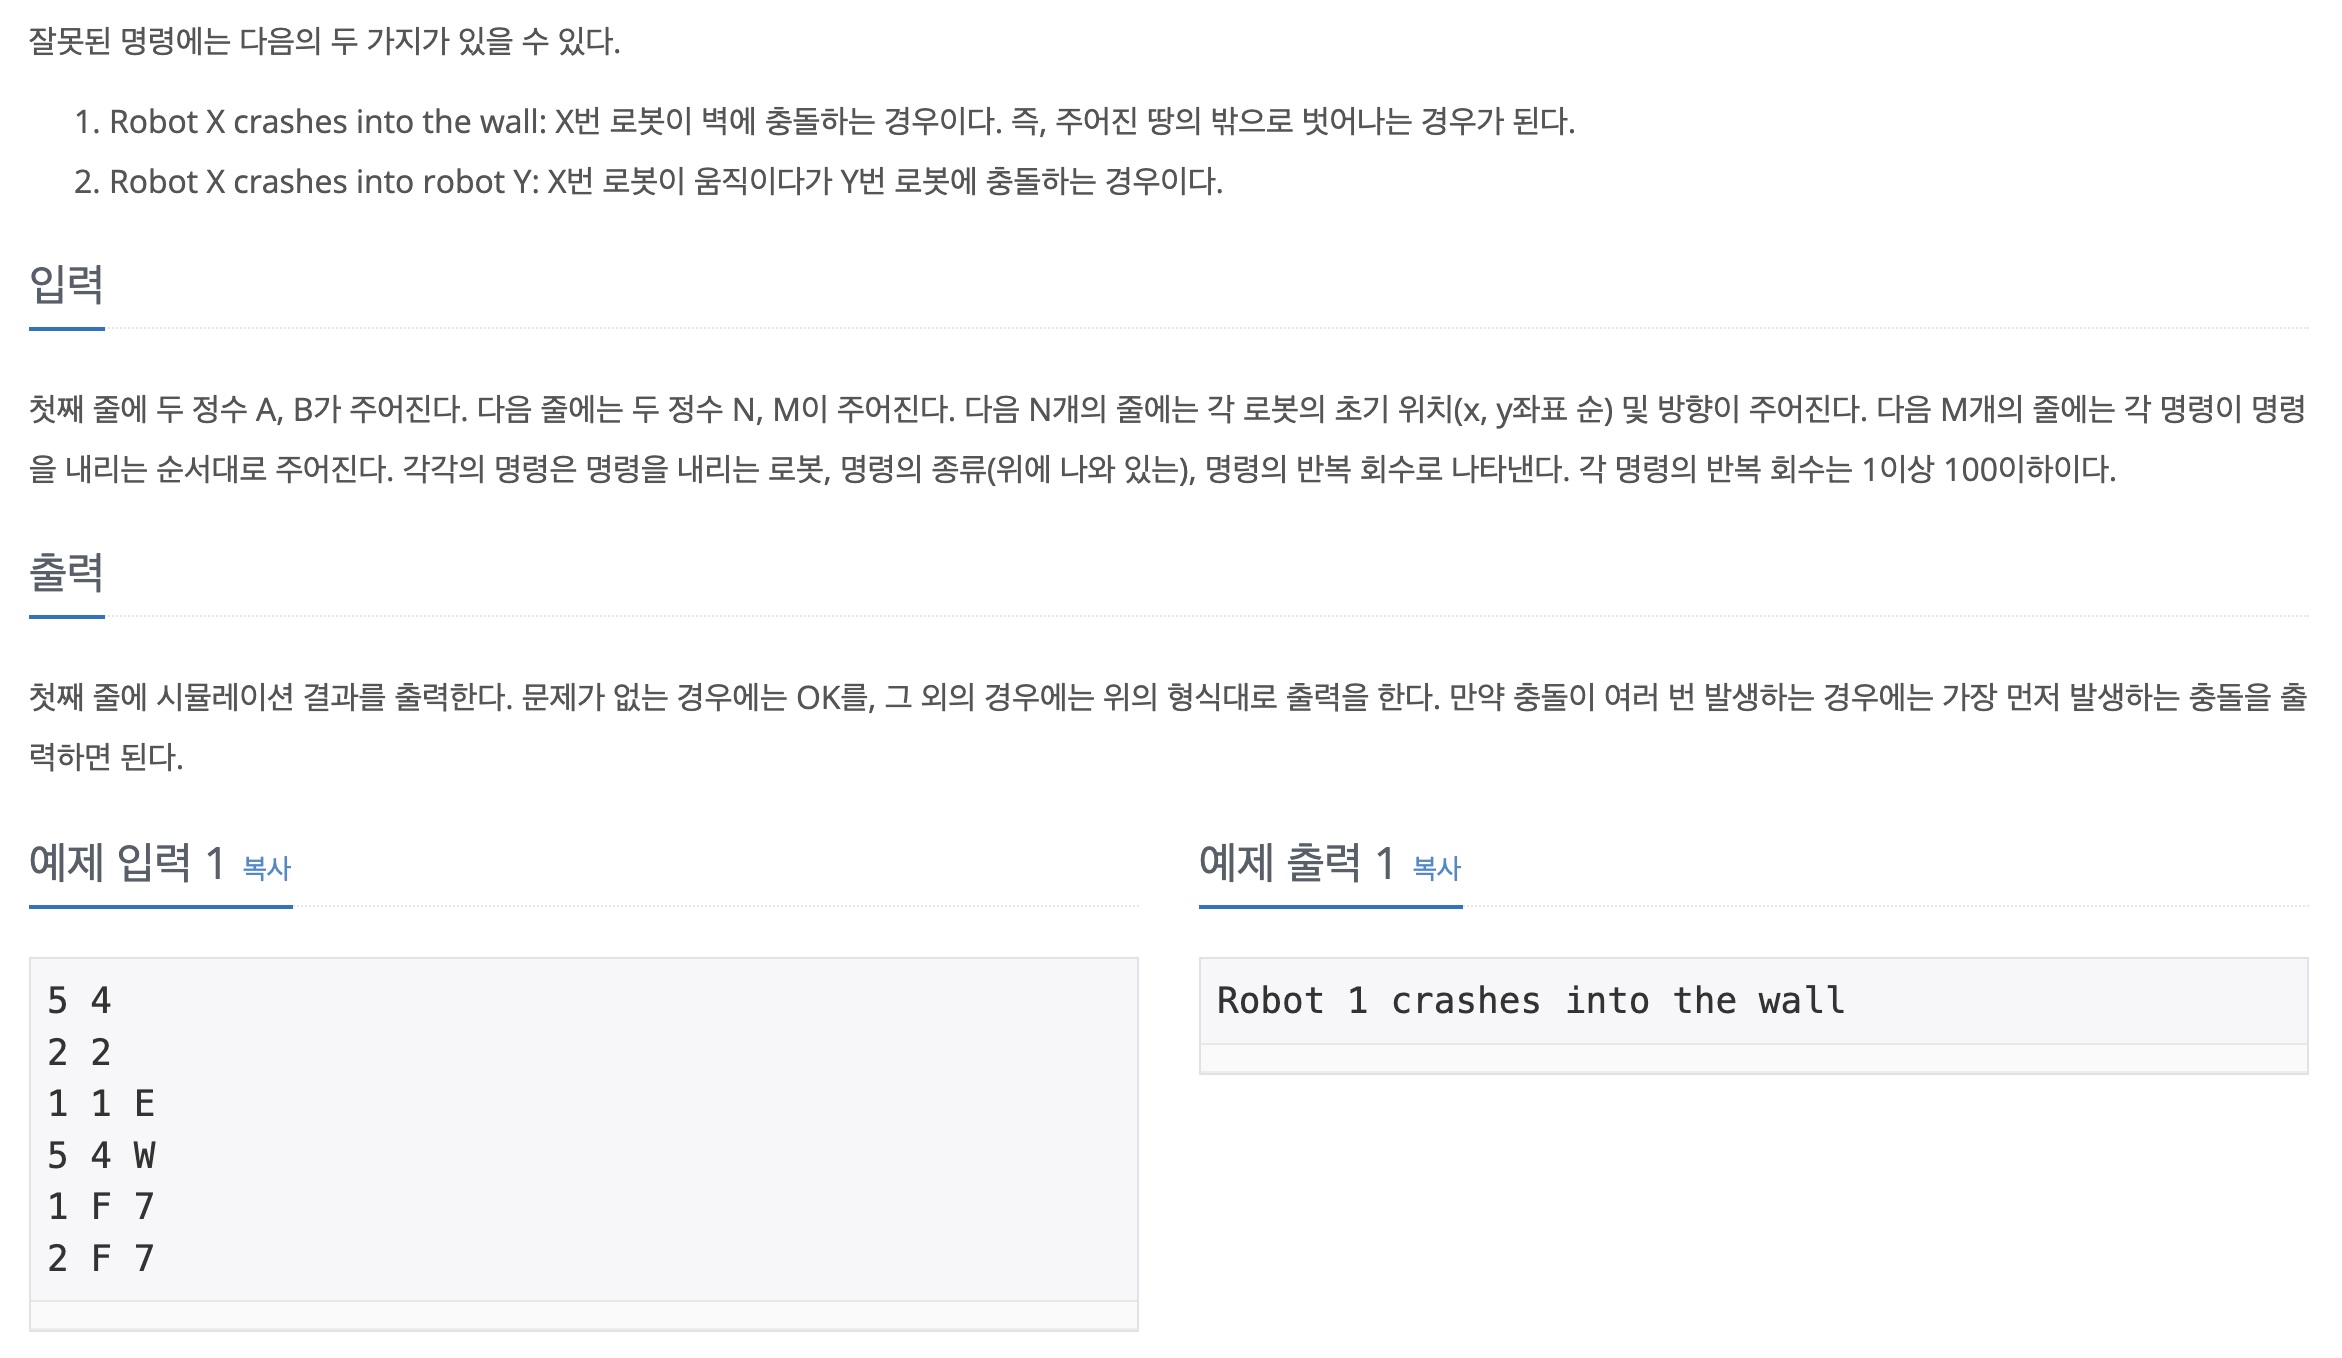

In [24]:
import sys
# input = sys.stdin.readline
A,B = map(int, input().split())
N,M = map(int, input().split())
robots = [[]]
# 초기 로봇 위치, 방향 설정
for _ in range(N):
    tmp = list(input().split())
    x, y, d = int(tmp[0]), int(tmp[1]), tmp[2]
    robots.append([x,y,d])

d_dict = {'N' : 0, 'E' : 1, 'S' : 2, 'W' : 3}
d_dict_b = {v:k for k,v in d_dict.items()}
d_list = ['N','E','S','W']
dx = [0,1,0,-1]
dy = [1,0,-1,0]

for _ in range(M):
    break_flag = False
    tmp = list(input().split())
    r_n, c, t = int(tmp[0]), tmp[1], int(tmp[2])
    
    d = d_dict[robots[r_n][2]]
    
    if c == 'L':
        t = t%4
        for _ in range(t):
            d -= 1
            if d == -1:
                d = 3 
        robots[r_n][2] = d_dict_b[d]

    elif c == 'R':
        t = t%4
        for _ in range(t):
            d += 1
            if d == 4:
                d = 0     
        robots[r_n][2] = d_dict_b[d]
        
    else: # 이동
        for _ in range(t):
            robots[r_n][0] += dx[d]
            robots[r_n][1] += dy[d]
            ## 다른 로봇과 충돌 처리 ##
            for i,each in enumerate(robots[1:]):
                x,y,_ = each[0], each[1], each[2]
                if i+1 != r_n:
                    if x == robots[r_n][0] and y == robots[r_n][1]:
                        print(f'Robot {r_n} crashes into robot {i+1}')
                        break_flag = True
                        break
                else:
                    pass
                
            if break_flag:
                break

            ## 벽과 충돌 처리 ##
            if robots[r_n][0] < 1 or robots[r_n][0] > A:
                print(f'Robot {r_n} crashes into the wall')
                break_flag = True
                break
                
            elif robots[r_n][1] < 1 or robots[r_n][1] > B:
                print(f'Robot {r_n} crashes into the wall')
                break_flag = True
                break
    
    if break_flag:
        break
else:
    print('OK')

5 4
2 2
1 1 E
5 4 W
1 L 96
1 F 2
OK


# 문제 2
- 주사위 굴리기
- https://www.acmicpc.net/problem/14499

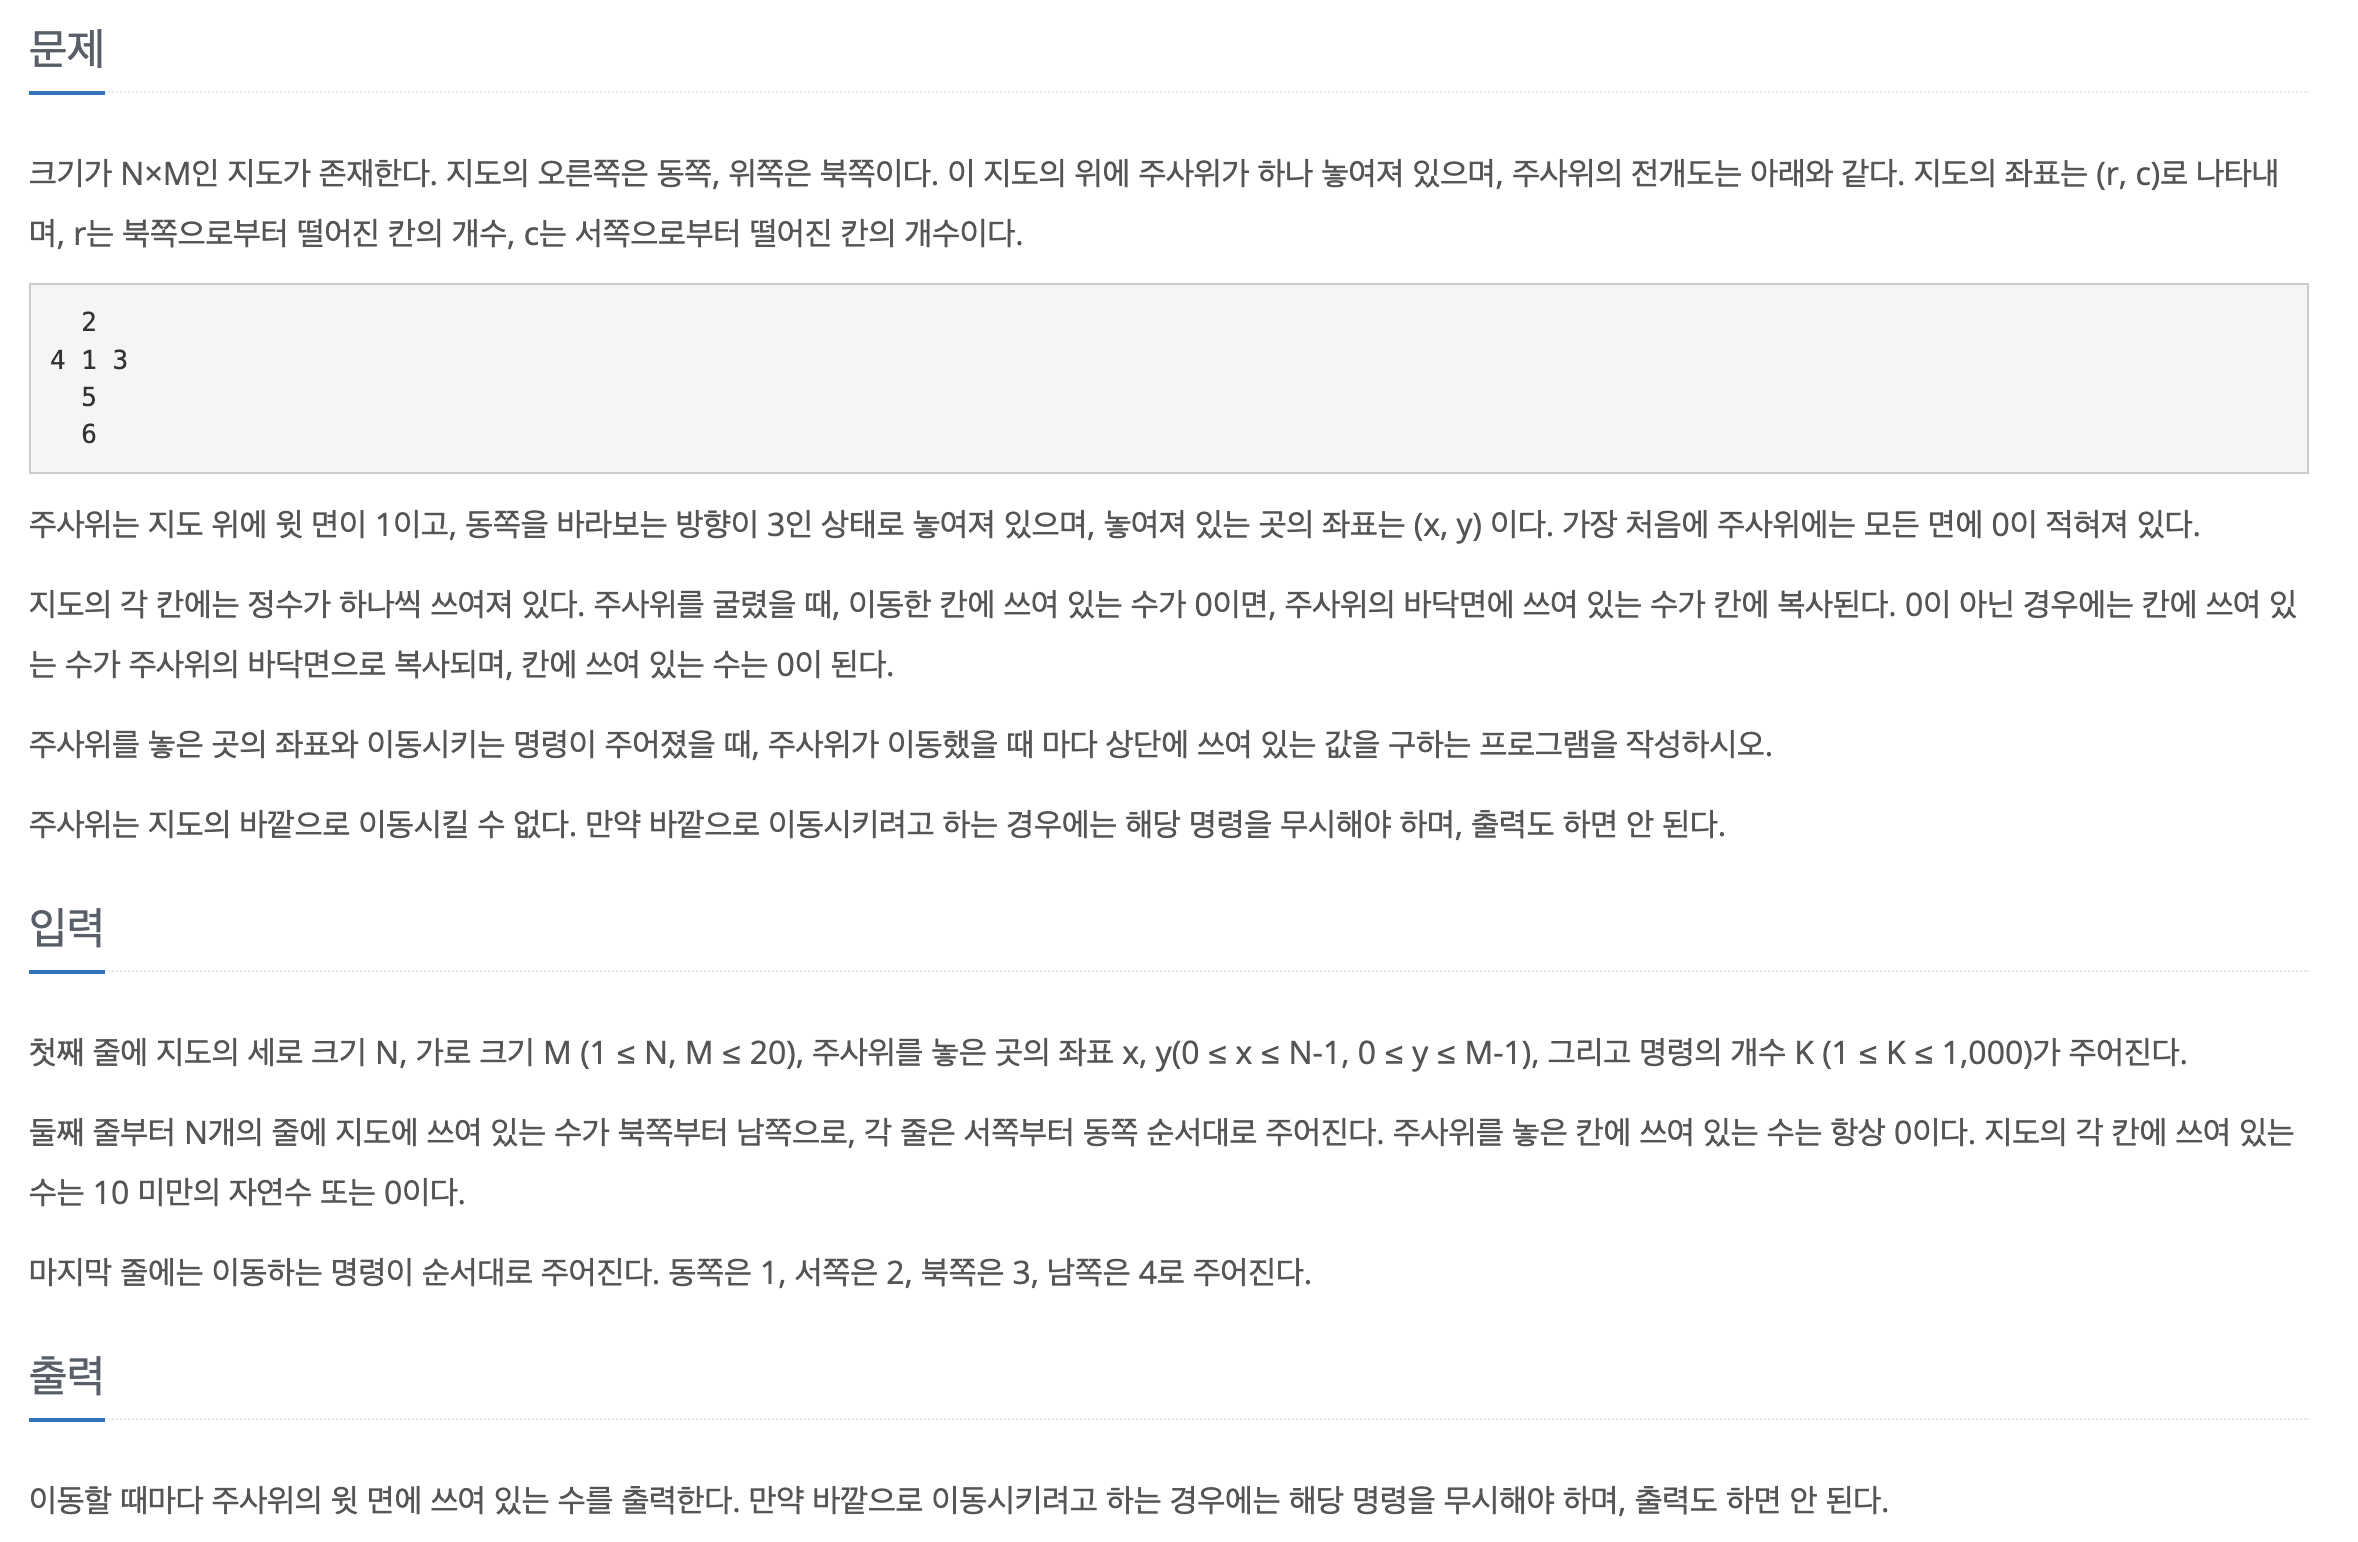
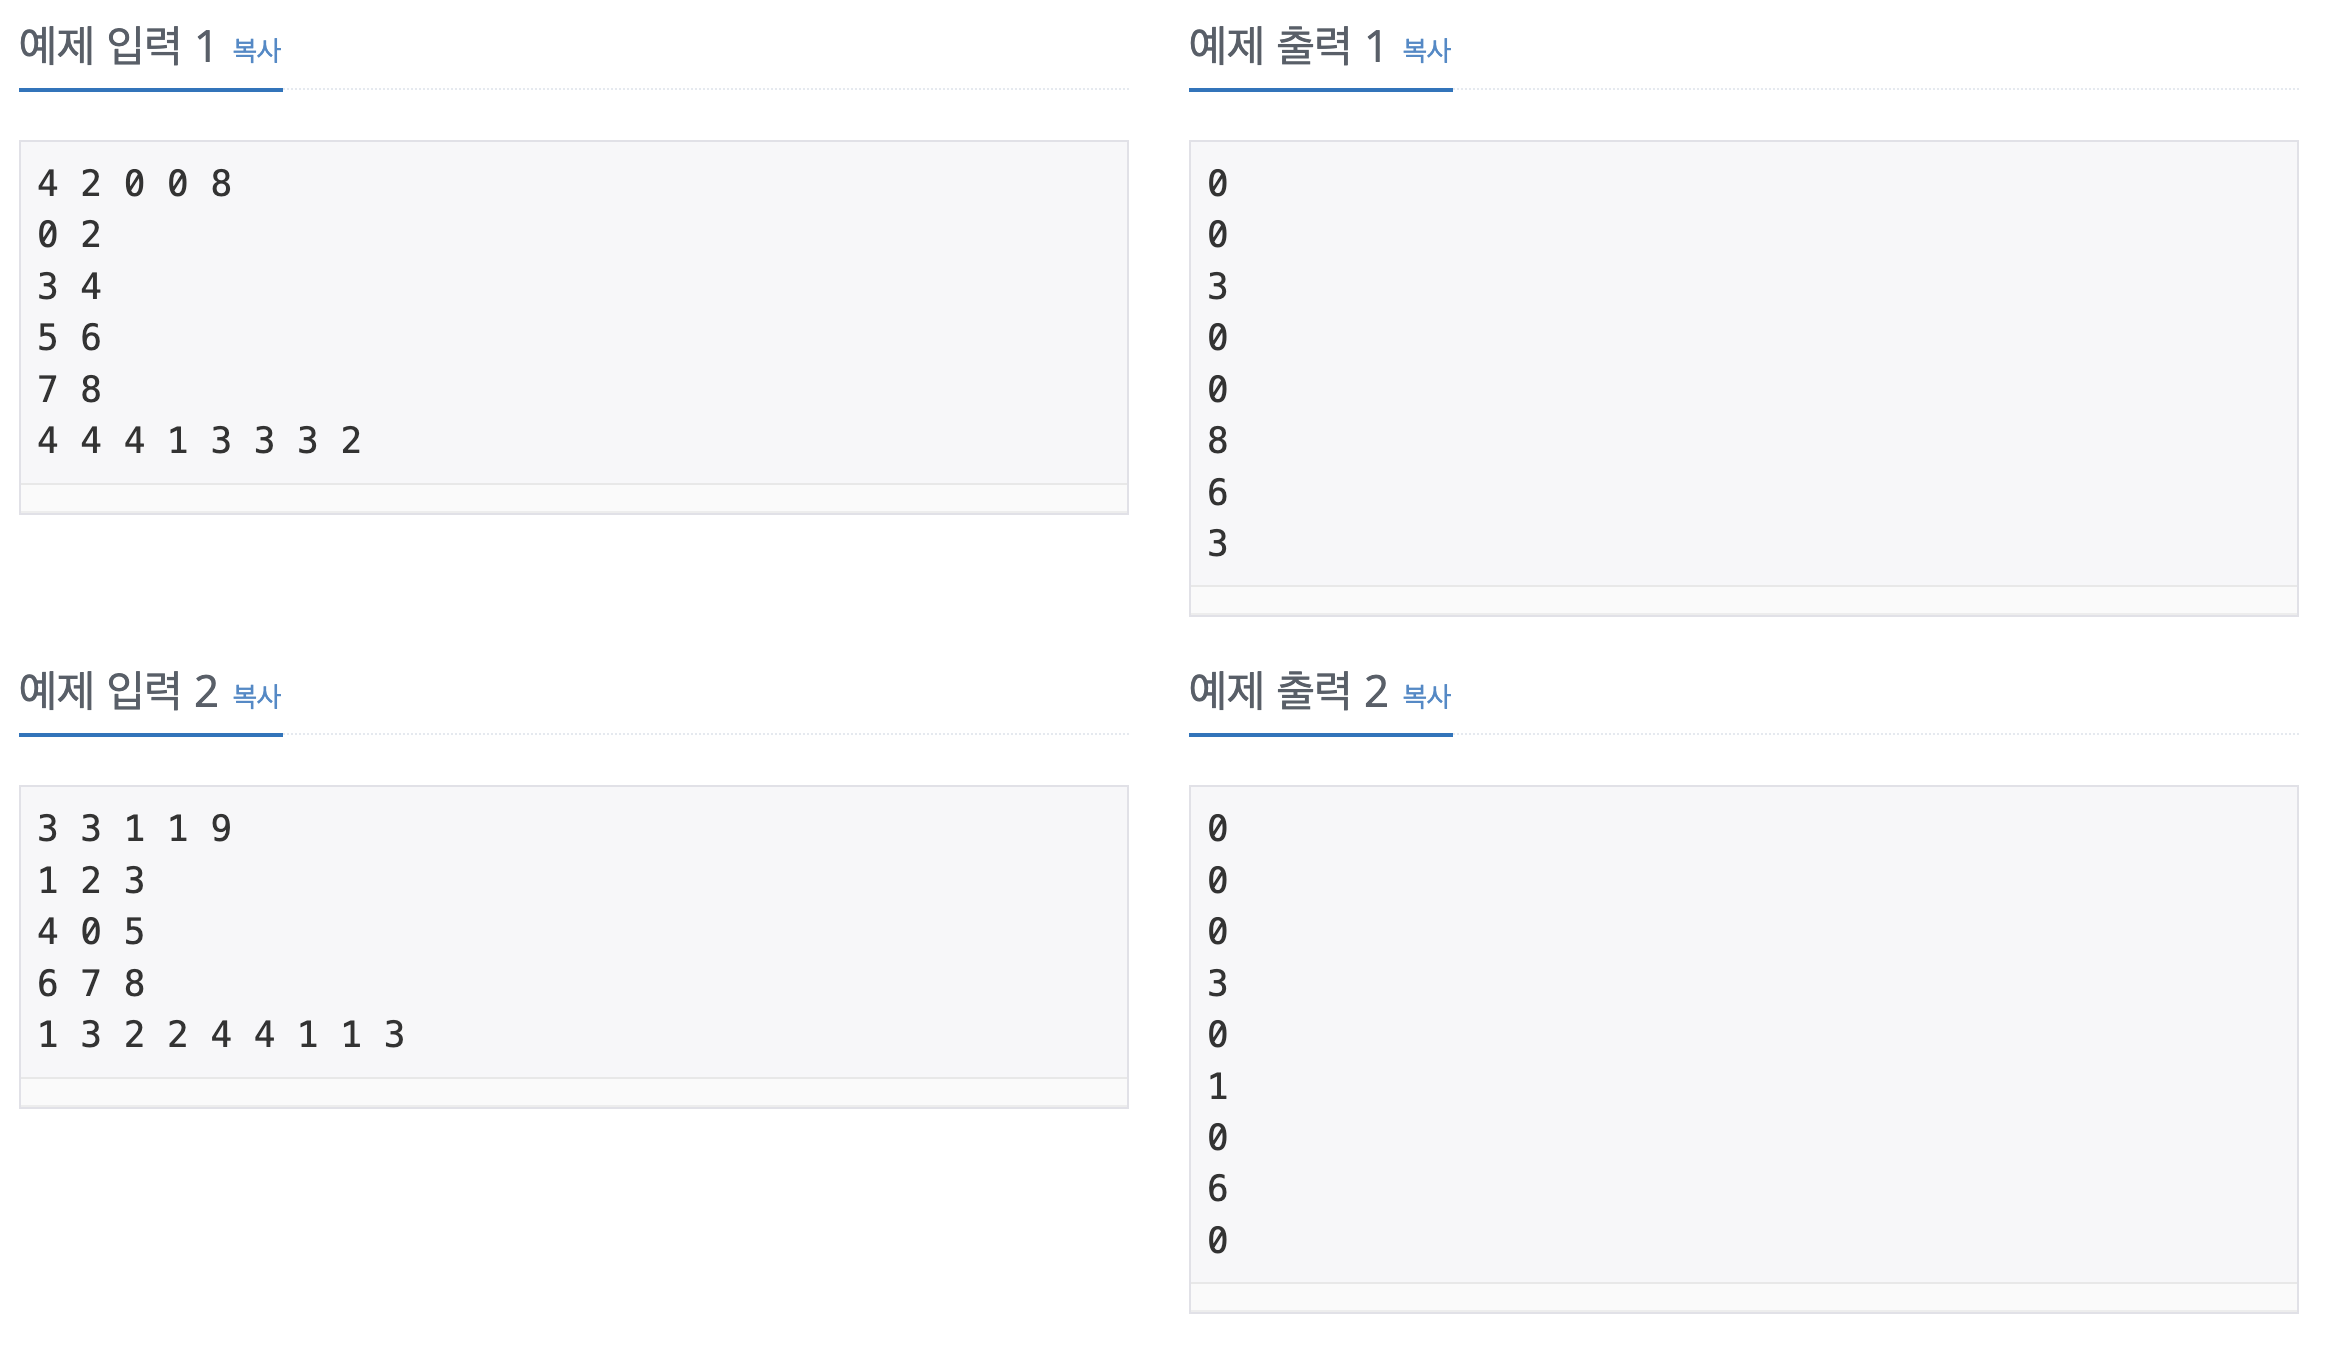
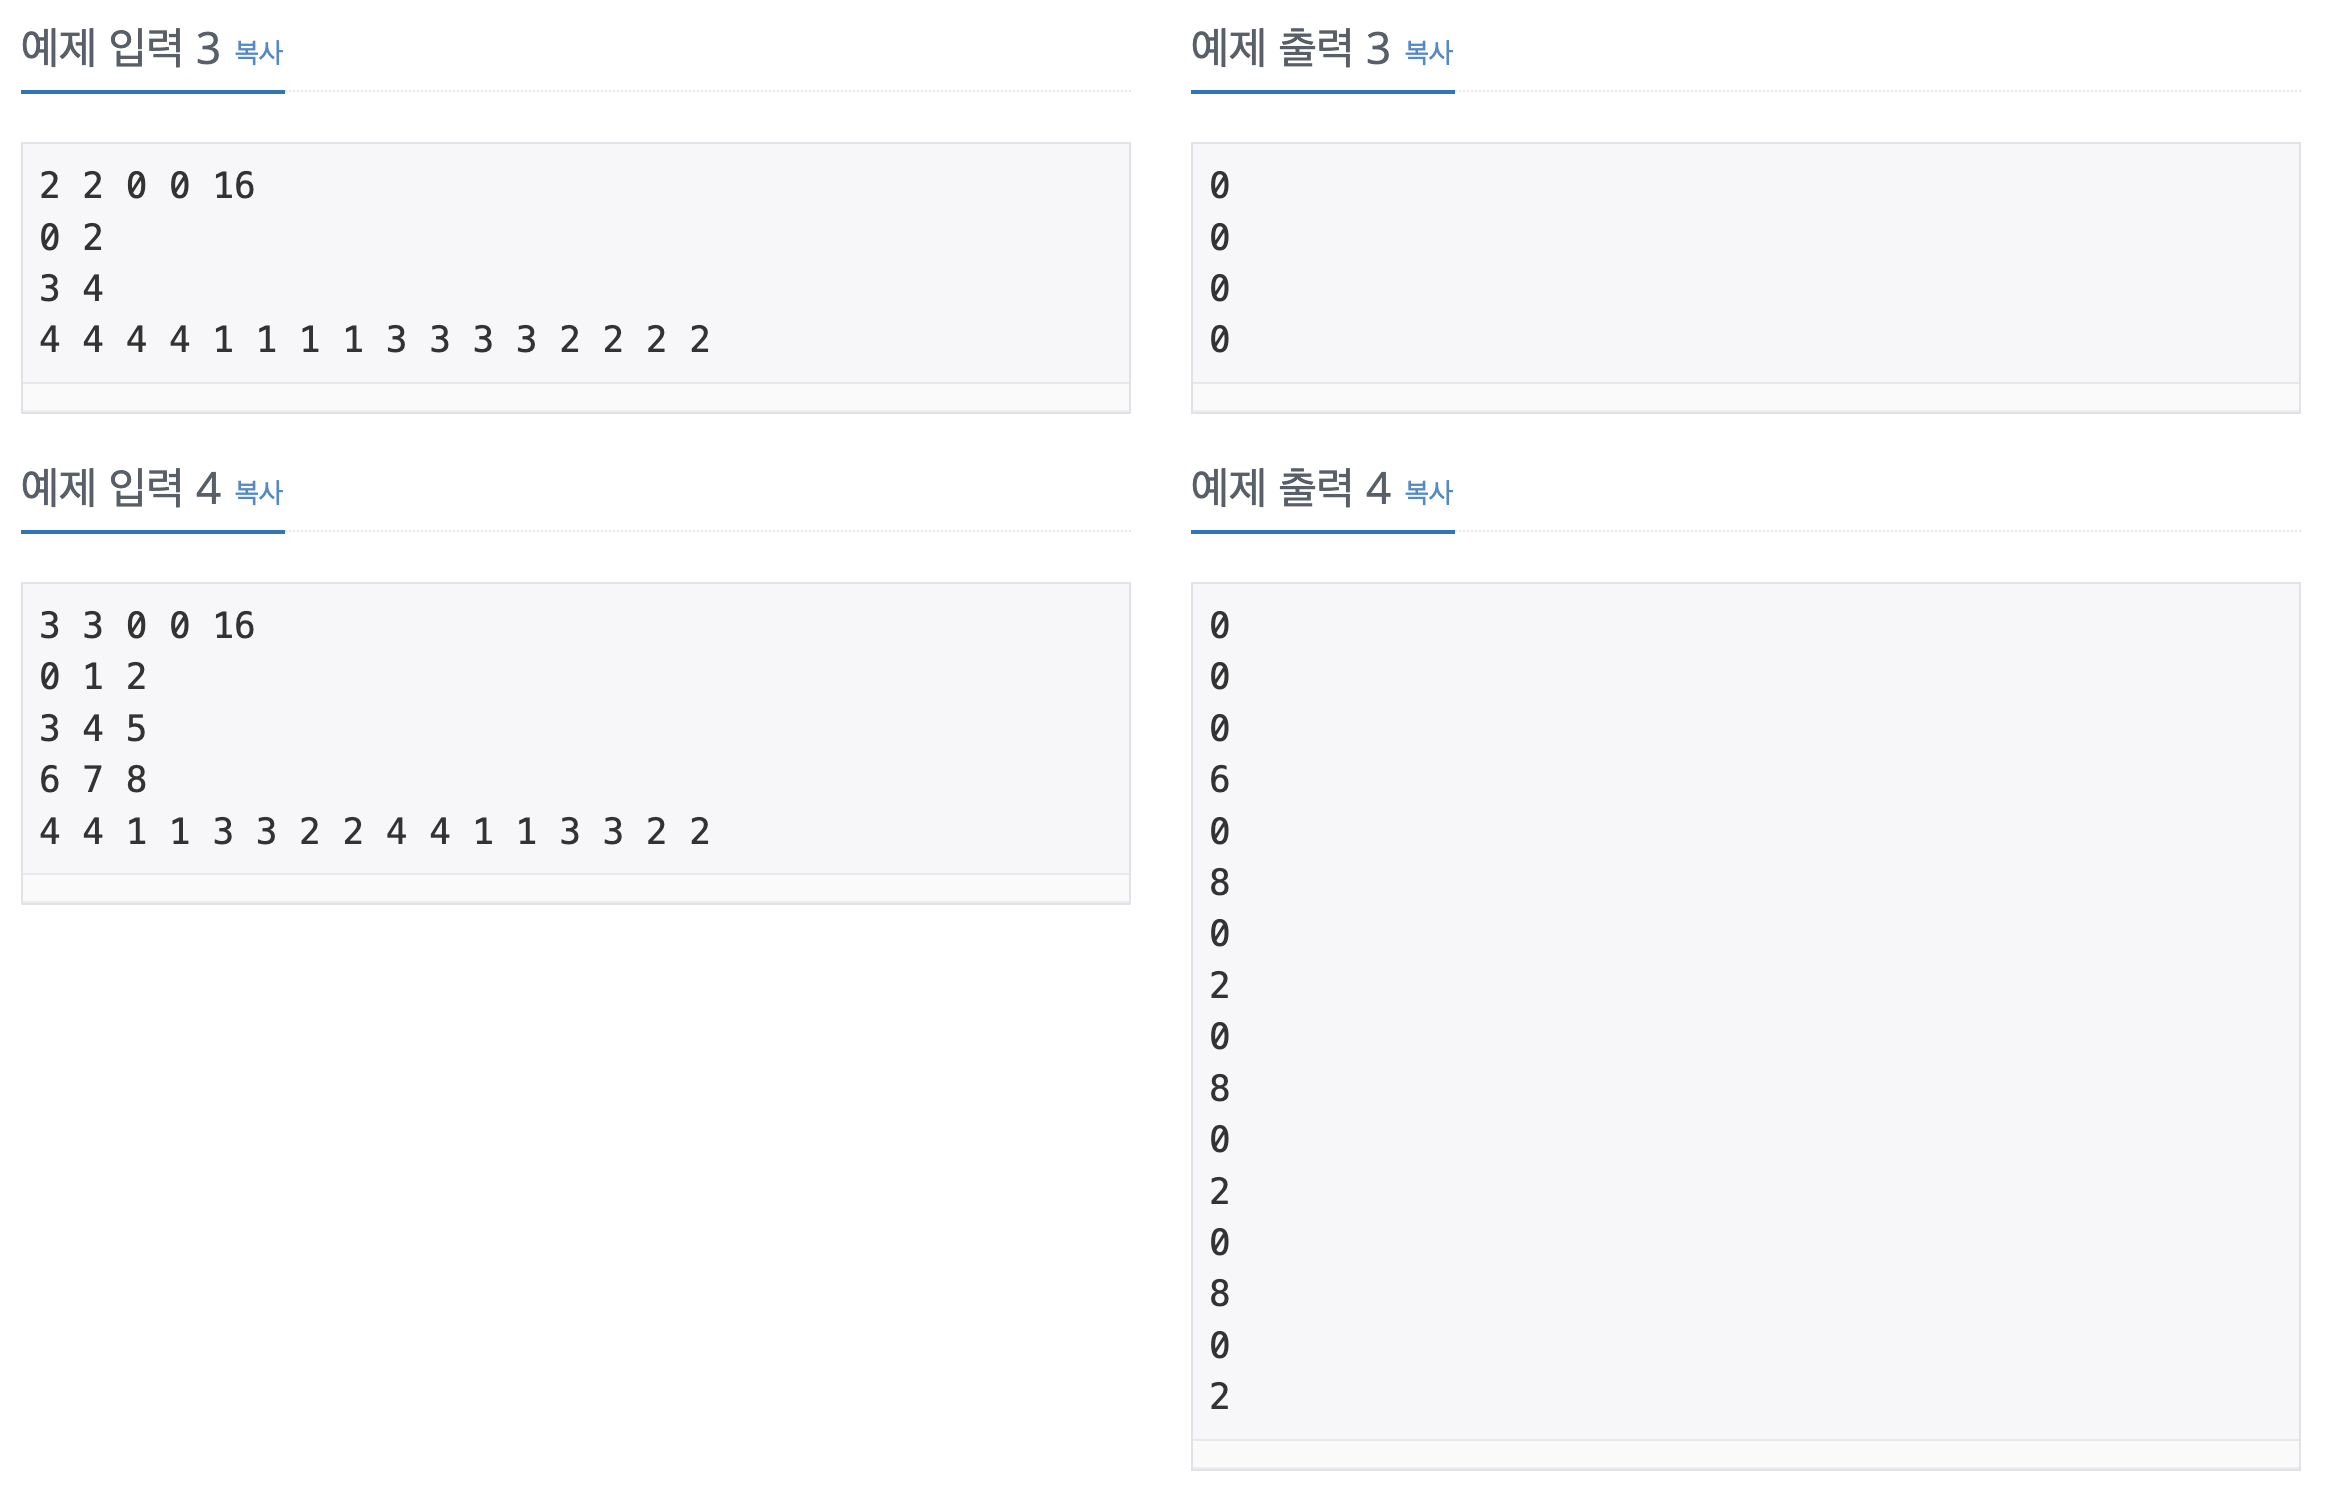

- 초기의 주사위에는 모두 0으로 적혀있다
- 굴리는 방향에 따라 주사위 리스트의 인덱스를 바꿔줘야겠다

In [63]:
import sys
# input = sys.stdin.readline
r,c,x,y,n = map(int, input().split())
board = []
for _ in range(r):
    tmp = list(map(int,input().split()))
    board.append(tmp)

command = list(map(int,input().split()))

dx = [0,0,0,-1,1]
dy = [0,1,-1,0,0]

dice = [0,0,0,0,0,0,0] # 인덱스 맞추기용으로 7칸 생성
for d in command:
    nx = x + dx[d]
    ny = y + dy[d]
    if 0<=nx<r and 0<=ny<c:
        if d == 1: # 동쪽
            dice[1],dice[3],dice[4],dice[6] = dice[4],dice[1],dice[6],dice[3]
        elif d == 2: # 서쪽
            dice[1],dice[3],dice[4],dice[6] = dice[3],dice[6],dice[1],dice[4]
        elif d == 3: # 남쪽
            dice[1],dice[2],dice[5],dice[6] = dice[2],dice[6],dice[1],dice[5]
        else: # 북쪽
            dice[1],dice[2],dice[5],dice[6] = dice[5],dice[1],dice[6],dice[2]
            
        if board[nx][ny] != 0:
            dice[6],board[nx][ny] = board[nx][ny],0
        else:
            board[nx][ny] = dice[6]

        print(dice[1])
        x,y = nx,ny

2 2 0 0 16
0 2
3 4
4 4 4 4 1 1 1 1 3 3 3 3 2 2 2 2
0
0
0
0
